In [1]:
# import pickle
# f = open('d:/testy','wb')
# pickle.dump(Y,f)
# f.close()

In [1]:
import pickle
f = open('d:/testy','rb')
Y = pickle.load(f)
f.close()

In [2]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb

# plt.style.use('seaborn-colorblind')


In [3]:
def rbf(X,xt,m):
    Xt = xt*np.ones(len(X))[:,None]
    k = ((X-Xt)**2)/(2*(2*m.kern.lengthscale[0])**2)
    ke = np.exp(-k)
    n = np.sum(ke)

    return n

def z_score(n):
    alpha = (2*np.log(n))**(-0.5)
    beta = (2*np.log(n))**(0.5) - (np.log(np.log(n))+np.log(2*np.pi))/(2*(2*np.log(n))**0.5)
    zp = beta-alpha*np.log(-np.log(0.92))
    return zp

def build_XI(input_list):
    num_outputs = len(input_list)
#     Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,I

In [4]:
# sampling code

# import GPy
# import numpy as np

# sample_size = 5
# X = np.random.uniform(0, 1., (sample_size, 1))
# Y = np.sin(X) + np.random.randn(sample_size, 1)*0.05

# kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
# model = GPy.models.GPRegression(X,Y,kernel, noise_var=1e-10)

# testX = np.linspace(0, 1, 100).reshape(-1, 1)
# posteriorTestY = model.posterior_samples_f(testX, full_cov=True, size=3)
# simY, simMse = model.predict(testX)

# plt.plot(testX, posteriorTestY)
# plt.plot(X, Y, 'ok', markersize=10)
# plt.plot(testX, simY - 3 * simMse ** 0.5, '--g')
# plt.plot(testX, simY + 3 * simMse ** 0.5, '--g')
# np.random.seed(100)

X = np.arange(0, 1.5,0.2)[:,None]
# Y = np.random.randn(len(X), 1)
kernel = GPy.kern.RBF(input_dim=1,lengthscale=0.4)

model = GPy.models.GPRegression(X,Y,kernel,noise_var=1e-8)
model.optimize()

Xt = np.linspace(0, 2, 200).reshape(-1, 1)
mu,var = model.predict(Xt)

n = rbf(X,1.6,model)
zp = z_score(n)
con_ue = mu + np.sqrt(var)*zp
con_le = mu - np.sqrt(var)*zp

con_u_gp = mu + np.sqrt(var)*1.96
con_l_gp = mu - np.sqrt(var)*1.96

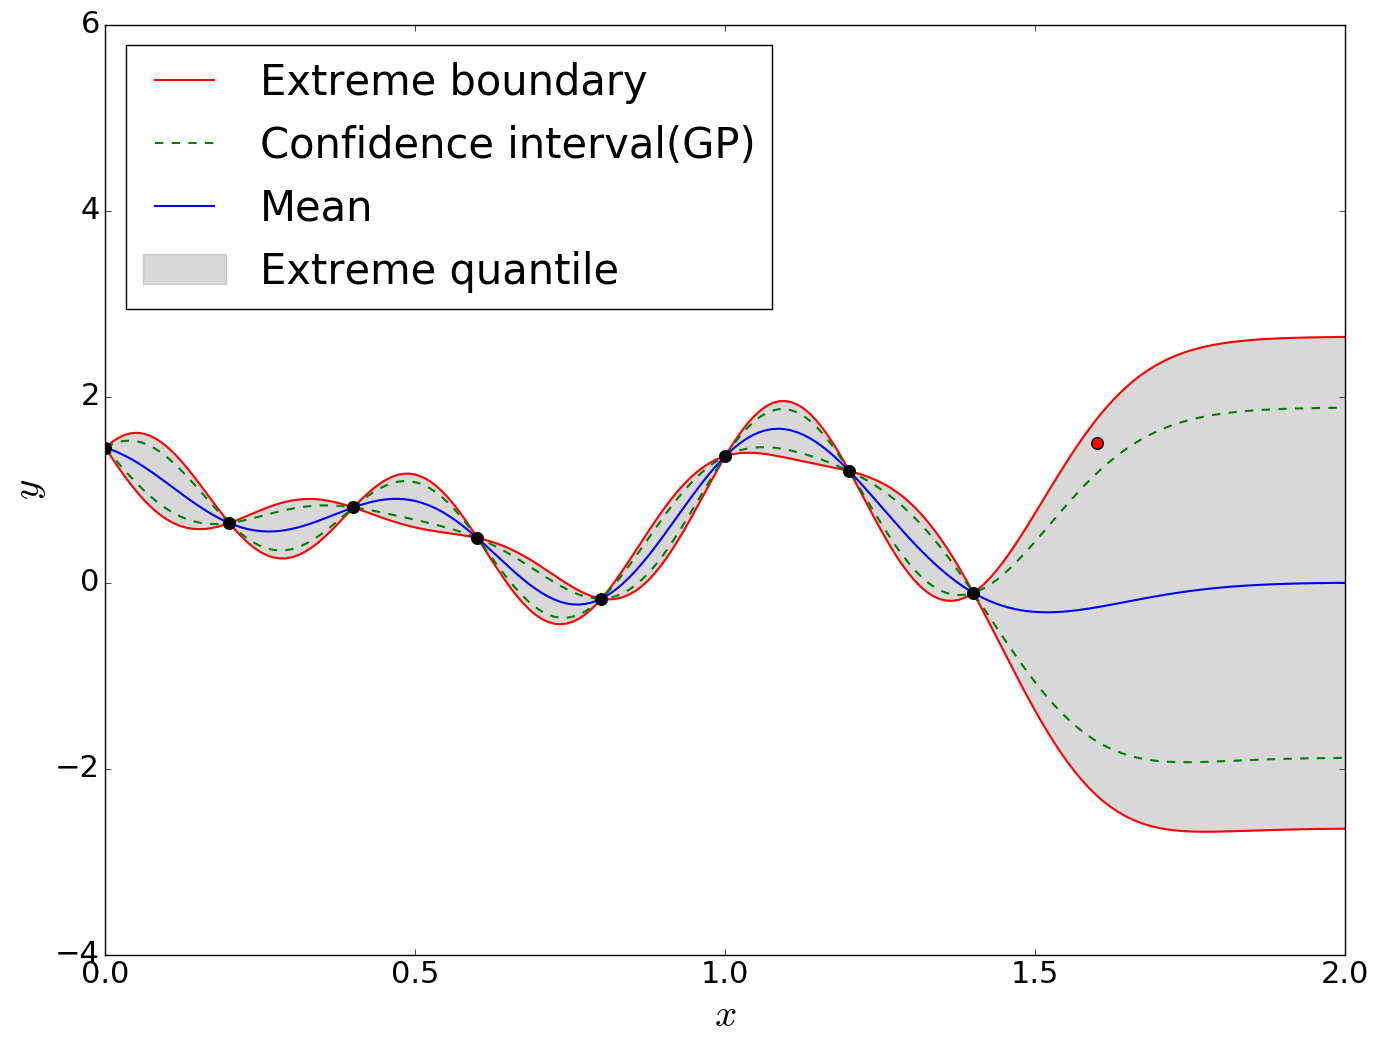

In [12]:
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0,2])
ax.set_ylim([-4,6])
plt.tick_params(labelsize=22)

ax.plot(Xt,con_ue,'red',label='Extreme boundary',zorder=1,lw=1.5)
ax.plot(Xt,con_le,'red',zorder=1,lw=1.5)
ax.fill_between(Xt[:,0], con_ue[:,0], con_le[:,0], color='gray', alpha=0.3,label="Extreme quantile")

ax.plot(Xt,con_u_gp,'--g',zorder=1,lw=1.5)
ax.plot(Xt,con_l_gp,'--g',label="Confidence interval(GP)",zorder=1,lw=1.5)
ax.plot(Xt,mu,'blue',label='Mean',zorder=1,lw=1.5)
plt.legend(loc=2,fontsize=30)
ax.scatter(X,Y,s=70,color='black',zorder=2)


# 2-1
ax.scatter(1.6,1.5,s=70,color='red',edgecolors='black')

# 3-1
# ax.scatter([1.6],[3.9],s=70,color='red',edgecolors='black')

# 3-2
# ax.scatter([1.6],[3.9],s=100,color='black',marker='x')
# ax.scatter([1.8],[2.3],s=70,color='red',edgecolors='black')

plt.xlabel(r'$x$',fontsize=28)
plt.ylabel(r'$y$',fontsize=28)

fig.savefig('2_1.png',bbox_inches='tight')

plt.show()

In [12]:
con_le.shape

(200, 1)

In [13]:
newX = np.vstack((X,np.array([1.6])))
newY = np.vstack((Y,np.array([1.5])))

kernel2 = GPy.kern.RBF(input_dim=1,lengthscale=0.4)
model2 = GPy.models.GPRegression(newX,newY,kernel2,noise_var=1e-8)
# model2['.*rbf.lengthscale'].constrain_fixed(0.2)
model2.optimize()

In [14]:
newXt = np.linspace(0, 2, 200).reshape(-1, 1)
newmu,newvar = model2.predict(newXt)

n2 = rbf(X,1.6,model2)
zp2 = z_score(n2)
con_ue2 = newmu + np.sqrt(newvar)*zp2
con_le2 = newmu - np.sqrt(newvar)*zp2

con_u_gp2 = newmu + np.sqrt(newvar)*1.96
con_l_gp2 = newmu - np.sqrt(newvar)*1.96

In [15]:
zp2

3.3365695332242336

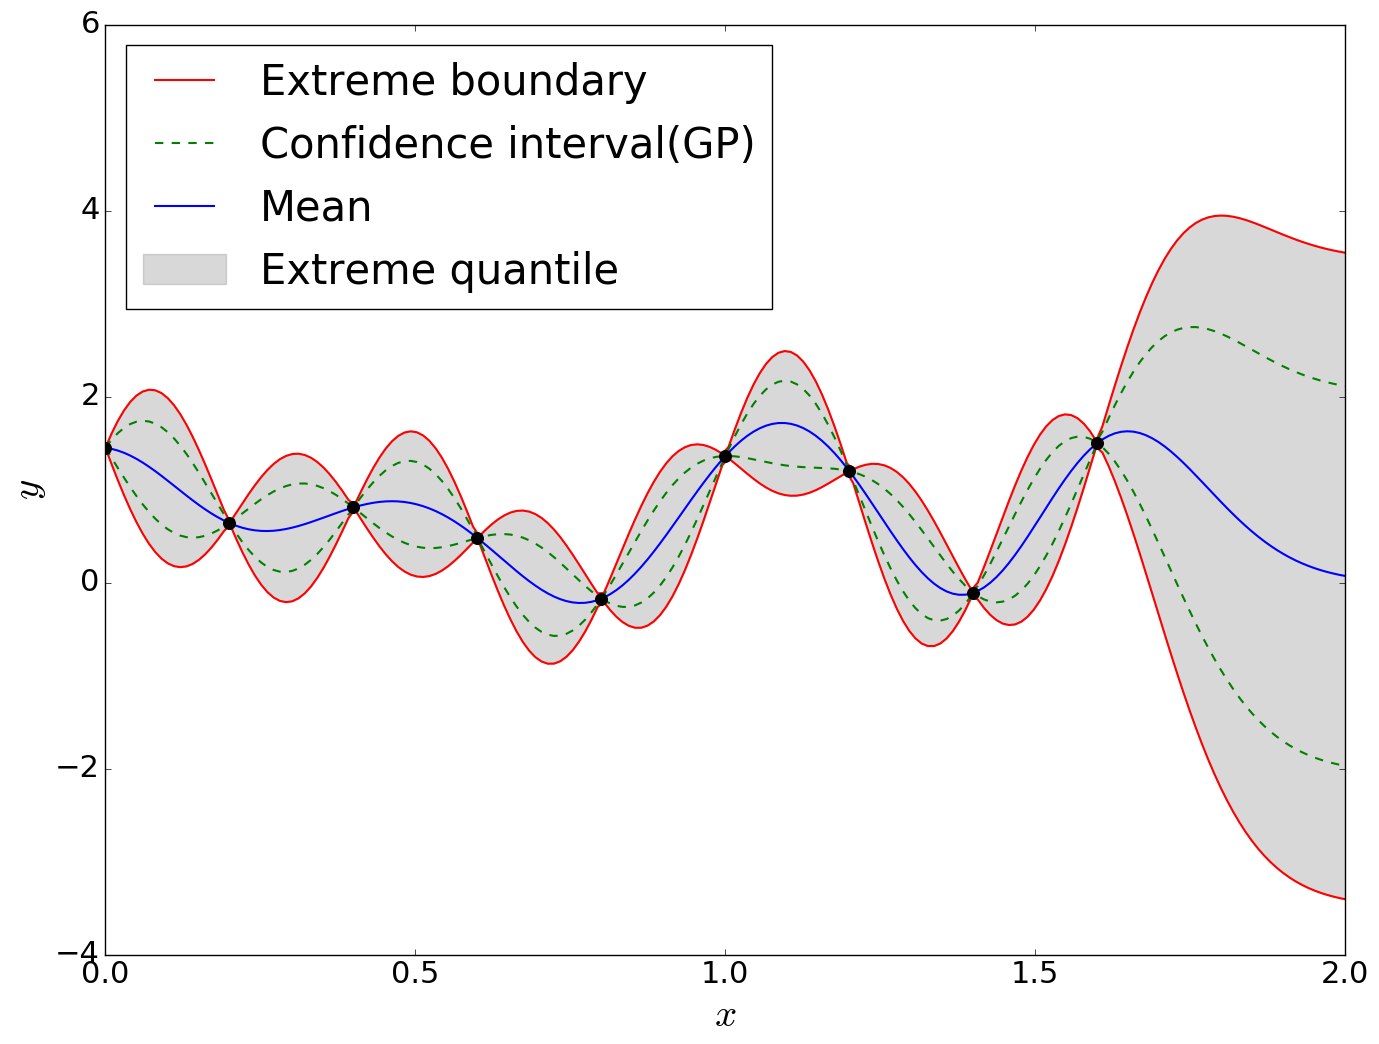

In [17]:
fig = plt.figure(figsize=(16,12))
plt.xlim([0,2])
plt.ylim([-4,6])
plt.tick_params(labelsize=22)

plt.plot(newXt,con_ue2,'red',label='Extreme boundary',zorder=1,lw=1.5)

plt.plot(newXt,con_le2,'red',zorder=1,lw=1.5)
plt.fill_between(newXt[:,0], con_ue2[:,0], con_le2[:,0], color='gray', alpha=0.3,label="Extreme quantile")


plt.plot(newXt,con_u_gp2,'--g',zorder=1,lw=1.5)
plt.plot(newXt,con_l_gp2,'--g',label="Confidence interval(GP)",zorder=1,lw=1.5)
plt.plot(newXt,newmu,'blue',label='Mean',zorder=1,lw=1.5)

plt.legend(loc=2,fontsize=30)
plt.scatter(newX,newY,s=70,color='black',zorder=2)

# plt.plot([1.6,1.6],[1.5,5.7],'o',color='red')

plt.xlabel(r'$x$',fontsize=28)
plt.ylabel(r'$y$',fontsize=28)

fig.savefig('2_2.png',bbox_inches='tight')

plt.show()

In [ ]:
np.vstack((X,np.array([1.6])))

In [ ]:
model2